### busca os dados na internet

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


##### cria uma nova feature FINALIZADO

In [2]:
troca = {
    0 : 1,
    1 : 0
}
dados['finished'] = dados.unfinished.map(troca)
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### plota a disperção no mesmo grafico

In [3]:
import seaborn as sns
sns.scatterplot(x = "expected_hours", y = "price", hue = "finished", data = dados)

### plota a disperção em gráficos diferentes

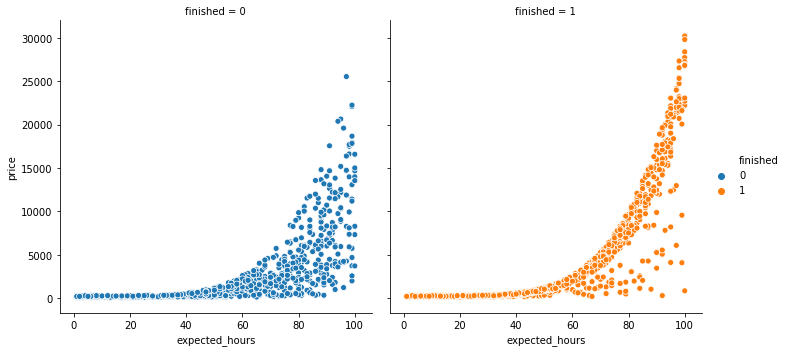

In [4]:
sns.relplot(x = "expected_hours", y = "price", hue = "finished", col = "finished" , data = dados)

## separa as colunas 

In [5]:
x = dados[["expected_hours" , "price"]]
y = dados["finished"]

## separa os dados, treina, prediz e mede a acuracia

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 30

treino_x, teste_x, treino_y, teste_y = train_test_split(
    x, y,
    random_state = SEED, test_size = 0.25,
    stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.svm import LinearSVC

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

from sklearn.metrics import accuracy_score
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.37%


/home/pedro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### cria a baseline - chuta que todos foram finalizados ( 1 ) 

In [7]:
import numpy as np
baseline = np.ones(540)
acuracia = accuracy_score(teste_y, baseline) * 100
print("A acurácia de baseline foi %.2f%%" % acuracia)

A acurácia de baseline foi 52.59%


# Analise do modelo
### iremos analizar todos os pontos do plano - verificando o que o modelo irá classficar 
#### iremos concluir que o classificador utilizado nao eh apropriado para o modelo
#### isso poq o modelo em questao eh linear, o comportamento dos dados eh n linear

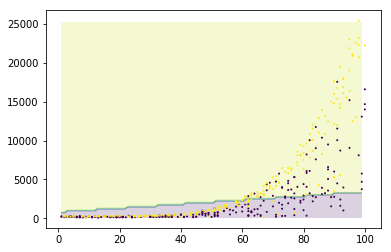

In [8]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()

# 100 pixels para cada exio
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha = 0.2)
plt.scatter(teste_x.expected_hours, teste_x.price, c = teste_y, s = 1)

## curva de decisão (decision boundary)
### a reta nao consegue se adaptar bem ao conjunto de dados do problema
### regiao em verde - classifica que FINALIZOU
### regiao em roxo - classifica que NAO FINALIZOU